In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("../../amazon_reviews_us_Grocery_v1_00.tsv", sep='\t', quoting=3)
df = df[["product_id", "star_rating", "review_body"]]
df

product_id  star_rating  \
0        B000SAQCWC            5   
1        B00509LVIQ            5   
2        B00KHXESLC            5   
3        B000F8JIIC            5   
4        B004ZWR9RQ            5   
...             ...          ...   
2402453  B00004TBB0            4   
2402454  B00000K1X9            5   
2402455  B00000K1X9            5   
2402456  B00000K1X9            5   
2402457  B00000K1X9            5   

                                               review_body  
0        As a family allergic to wheat, dairy, eggs, nu...  
1        My favorite nut.  Creamy, crunchy, salty, and ...  
2        This green tea tastes so good! My girlfriend l...  
3        I love Melissa's brand but this is a great sec...  
4                                                     good  
...                                                    ...  
2402453  The Amor Belhom Duo are likely the only musici...  
2402454  Being  a  Breyer  collecter  almost  all  of  ...  
2402455  This model is beautiful.  each model is hand p...  
2402456  As a person who has collected Breyers all my l...  
2402457  This Breyer horse is wonderful. She is beautif...  

[2402458 rows x 3 columns]

In [99]:
data = df.dropna()
data = data.query('star_rating < 4', engine='python')
data = data.sample(100000)
data

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id  star_rating  \
133087   B0051C0G2O            1   
22438    B00LAQ4Z1I            1   
1616343  B003SC0Q4C            2   
2189064  B001EQ5JLY            2   
2390069  B000FBM3TA            3   
...             ...          ...   
2128803  B00462Z2QA            3   
1681952  B00C2JQIKI            1   
352260   B007PM9OSK            1   
2299491  B000E1695A            2   
68405    B000HDJZEM            3   

                                               review_body  
133087   Tastes too oily and made me sick to my stomach...  
22438    I LOVE Brownie Brittle.  I need to have them i...  
1616343  I absolutely love a strong ginger beer like Re...  
2189064  I ordered this tea for a change and, indeed, i...  
2390069  The original Hit cookies had an almost-nutella...  
...                                                    ...  
2128803  As others stated in previous reviews, this dri...  
1681952  Items are not in good shape. Cans having a lot...  
352260   I love the regular, but the Columbian is foul....  
2299491  Compared to other brands of instant soup cups,...  
68405                                     stanky fish eggs  

[100000 rows x 3 columns]

In [100]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = data["review_body"]
data

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


133087     Tastes too oily and made me sick to my stomach...
22438      I LOVE Brownie Brittle.  I need to have them i...
1616343    I absolutely love a strong ginger beer like Re...
2189064    I ordered this tea for a change and, indeed, i...
2390069    The original Hit cookies had an almost-nutella...
                                 ...                        
2128803    As others stated in previous reviews, this dri...
1681952    Items are not in good shape. Cans having a lot...
352260     I love the regular, but the Columbian is foul....
2299491    Compared to other brands of instant soup cups,...
68405                                       stanky fish eggs
Name: review_body, Length: 100000, dtype: object

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


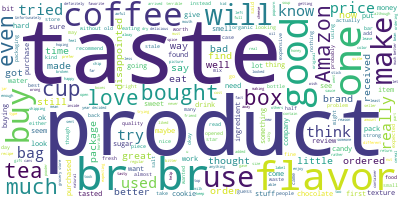

In [101]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [102]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Tastes',
  'too',
  'oily',
  'and',
  'made',
  'me',
  'sick',
  'to',
  'my',
  'stomach',
  '.',
  'Also',
  'it',
  'was',
  'delivered',
  'completely',
  'melted',
  '-',
  'thanks',
  'for',
  'considering',
  'the',
  'fact',
  'that',
  'you',
  'are',
  'delivering',
  'to',
  'Arizona',
  '.'],
 ['I',
  'LOVE',
  'Brownie',
  'Brittle',
  '.',
  'I',
  'need',
  'to',
  'have',
  'them',
  'in',
  'individual',
  'packets',
  'so',
  'that',
  'I',
  'can',
  'control',
  'myself',
  '.',
  'That',
  'is',
  'why',
  'I',
  'ordered',
  'from',
  'Amazon.',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  '>',
  'I',
  'was',
  'sent',
  'a',
  'STALE',
  'product',
  'in',
  'a',
  're-taped',
  ',',
  'tampered',
  'box',
  '.',
  'Shame',
  'on',
  'you',
  'Amazon',
  'for',
  'sending',
  'this',
  'out',
  '.',
  'Clearly',
  ',',
  'the',
  'box',
  ',',
  'which',
  'has',
  'an',
  'expiration',
  'date',
  'of',
  'November',
  '14',
  ',',
  '2015',
  'was

In [103]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tastes',
  'too',
  'oily',
  'and',
  'made',
  'me',
  'sick',
  'to',
  'my',
  'stomach',
  '.',
  'also',
  'it',
  'was',
  'delivered',
  'completely',
  'melted',
  '-',
  'thanks',
  'for',
  'considering',
  'the',
  'fact',
  'that',
  'you',
  'are',
  'delivering',
  'to',
  'arizona',
  '.'],
 ['i',
  'love',
  'brownie',
  'brittle',
  '.',
  'i',
  'need',
  'to',
  'have',
  'them',
  'in',
  'individual',
  'packets',
  'so',
  'that',
  'i',
  'can',
  'control',
  'myself',
  '.',
  'that',
  'is',
  'why',
  'i',
  'ordered',
  'from',
  'amazon.',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  '>',
  'i',
  'was',
  'sent',
  'a',
  'stale',
  'product',
  'in',
  'a',
  're-taped',
  ',',
  'tampered',
  'box',
  '.',
  'shame',
  'on',
  'you',
  'amazon',
  'for',
  'sending',
  'this',
  'out',
  '.',
  'clearly',
  ',',
  'the',
  'box',
  ',',
  'which',
  'has',
  'an',
  'expiration',
  'date',
  'of',
  'november',
  '14',
  ',',
  '2015',
  'was

In [104]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('tastes', 'NOUN'),
  ('too', 'ADV'),
  ('oily', 'ADV'),
  ('and', 'CONJ'),
  ('made', 'VERB'),
  ('me', 'PRON'),
  ('sick', 'ADJ'),
  ('to', 'PRT'),
  ('my', 'PRON'),
  ('stomach', 'NOUN'),
  ('.', '.'),
  ('also', 'ADV'),
  ('it', 'PRON'),
  ('was', 'VERB'),
  ('delivered', 'VERB'),
  ('completely', 'ADV'),
  ('melted', 'VERB'),
  ('-', '.'),
  ('thanks', 'NOUN'),
  ('for', 'ADP'),
  ('considering', 'VERB'),
  ('the', 'DET'),
  ('fact', 'NOUN'),
  ('that', 'ADP'),
  ('you', 'PRON'),
  ('are', 'VERB'),
  ('delivering', 'VERB'),
  ('to', 'PRT'),
  ('arizona', 'VERB'),
  ('.', '.')],
 [('i', 'NOUN'),
  ('love', 'VERB'),
  ('brownie', 'NOUN'),
  ('brittle', 'NOUN'),
  ('.', '.'),
  ('i', 'VERB'),
  ('need', 'VERB'),
  ('to', 'PRT'),
  ('have', 'VERB'),
  ('them', 'PRON'),
  ('in', 'ADP'),
  ('individual', 'ADJ'),
  ('packets', 'NOUN'),
  ('so', 'ADP'),
  ('that', 'ADP'),
  ('i', 'NOUN'),
  ('can', 'VERB'),
  ('control', 'VERB'),
  ('myself', 'PRON'),
  ('.', '.'),
  ('that', 'DET'),
  

In [106]:
data_words = remove_stopwords(negated_tagged)
data_words

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('tastes', 'NOUN'),
  ('oily', 'ADV'),
  ('made', 'VERB'),
  ('sick', 'ADJ'),
  ('stomach', 'NOUN'),
  ('also', 'ADV'),
  ('delivered', 'VERB'),
  ('completely', 'ADV'),
  ('melted', 'VERB'),
  ('thanks', 'NOUN'),
  ('considering', 'VERB'),
  ('fact', 'NOUN'),
  ('delivering', 'VERB'),
  ('arizona', 'VERB')],
 [('love', 'VERB'),
  ('brownie', 'NOUN'),
  ('brittle', 'NOUN'),
  ('need', 'VERB'),
  ('individual', 'ADJ'),
  ('packets', 'NOUN'),
  ('control', 'VERB'),
  ('ordered', 'VERB'),
  ('amazon.', 'ADJ'),
  ('sent', 'VERB'),
  ('stale', 'ADJ'),
  ('product', 'NOUN'),
  ('re-taped', 'ADJ'),
  ('tampered', 'ADJ'),
  ('box', 'NOUN'),
  ('shame', 'NOUN'),
  ('amazon', 'VERB'),
  ('sending', 'VERB'),
  ('clearly', 'ADV'),
  ('box', 'NOUN'),
  ('expiration', 'NOUN'),
  ('date', 'NOUN'),
  ('november', 'ADJ'),
  ('14', 'NUM'),
  ('2015', 'NUM'),
  ('reused', 'VERB'),
  ('tried', 'VERB'),
  ('find', 'VERB'),
  ('date', 'NOUN'),
  ('individual', 'ADJ'),
  ('packets', 'NOUN'),
  ('stamped_NE

In [107]:
#gets adjectives
'''
def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'ADJ' or tag == 'ADV' or tag == 'NOUN' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
data_words


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tastes',
  'oily',
  'made',
  'sick',
  'stomach',
  'also',
  'delivered',
  'completely',
  'melted',
  'thanks',
  'considering',
  'fact',
  'delivering',
  'arizona'],
 ['love',
  'brownie',
  'brittle',
  'need',
  'individual',
  'packets',
  'control',
  'ordered',
  'amazon.',
  'sent',
  'stale',
  'product',
  're-taped',
  'tampered',
  'box',
  'shame',
  'amazon',
  'sending',
  'clearly',
  'box',
  'expiration',
  'date',
  'november',
  '14',
  '2015',
  'reused',
  'tried',
  'find',
  'date',
  'individual',
  'packets',
  'stamped_NEG',
  'date_NEG',
  'clearly_NEG',
  'old._NEG',
  'guess_NEG',
  'way_NEG',
  'stay_NEG',
  'diet_NEG',
  'plan_NEG'],
 ['absolutely',
  'love',
  'strong',
  'ginger',
  'beer',
  'like',
  'reed',
  "'s",
  'searching',
  'ginger',
  'beer/ale',
  'lower',
  'calories',
  'still',
  'good',
  'ginger',
  'bite',
  'excited',
  'find',
  'blue',
  'sky',
  'imagine',
  'disappointment',
  'took',
  'first',
  'sip',
  'tasted',
  '

In [108]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(28, 1),
  (31, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 3),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(12, 1),
  (35, 1),
  (63, 1),
  (65, 1),
  (67, 1),
  (76, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83,

In [109]:
# number of topics
num_topics = 100
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(83,
  '0.019*"n\'t" + 0.018*"\'s" + 0.018*"like" + 0.016*"flavor" + '
  '0.012*"blueberry" + 0.011*"spicy" + 0.011*"taste" + 0.010*"would" + '
  '0.010*"good" + 0.010*"curry"'),
 (80,
  '0.172*"tea" + 0.039*"tea_NEG" + 0.018*"teas" + 0.014*"\'s" + 0.013*"flavor" '
  '+ 0.010*"like" + 0.010*"leaves" + 0.010*"ginger" + 0.009*"bags" + '
  '0.009*"good"'),
 (91,
  '0.022*"starbucks" + 0.021*"ground" + 0.021*"bean" + 0.019*"n\'t" + '
  '0.018*"beans" + 0.017*"espresso" + 0.015*"coffee" + 0.015*"beans_NEG" + '
  '0.013*"coffee_NEG" + 0.013*"flavor_NEG"'),
 (73,
  '0.023*"like" + 0.022*"n\'t" + 0.021*"taste_NEG" + 0.019*"coconut_NEG" + '
  '0.018*"taste" + 0.018*"like_NEG" + 0.011*"n\'t_NEG" + 0.010*"flavor_NEG" + '
  '0.010*"pizza" + 0.010*"flavor"'),
 (54,
  '0.039*"gross" + 0.023*"soda" + 0.023*"impressed_NEG" + 0.019*"diet" + '
  '0.016*"taste" + 0.012*"purpose" + 0.012*"im" + 0.009*"lol" + 0.009*"would" '
  '+ 0.007*"brownies"'),
 (30,
  '0.056*"--_NEG" + 0.034*"chicken" + 0.015*"yogur

In [110]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.060*"store" + 0.037*"grocery" + 0.025*"local" + 0.022*"sour" + '
  '0.015*"bought" + 0.013*"packages" + 0.012*"thin" + 0.012*"buy" + '
  '0.012*"didnt" + 0.011*"cheaper"'),
 (1,
  '0.014*"\'s" + 0.013*"chai" + 0.011*"n\'t" + 0.011*"like" + 0.009*"one" + '
  '0.008*"day" + 0.008*"\'ve" + 0.008*"month" + 0.007*"time" + 0.007*"\'m"'),
 (2,
  '0.030*"product" + 0.019*"amazon" + 0.017*"amazon_NEG" + 0.017*"received" + '
  '0.016*"company" + 0.016*"product_NEG" + 0.014*"ordered" + '
  '0.013*"return_NEG" + 0.012*"received_NEG" + 0.011*"order_NEG"'),
 (3,
  '0.028*"like" + 0.022*"could" + 0.021*"n\'t" + 0.018*"horrible" + '
  '0.014*"taste" + 0.013*"return" + 0.012*"would" + 0.011*"wish" + '
  '0.011*"tastes" + 0.010*"zero"'),
 (4,
  '0.041*"rice" + 0.030*"salty" + 0.018*"taste" + 0.017*"artificial" + '
  '0.016*"almond" + 0.016*"flavor" + 0.014*"like" + 0.013*"better" + '
  '0.013*"brown" + 0.011*"n\'t"'),
 (5,
  '0.076*"seeds" + 0.019*"seeds_NEG" + 0.012*"n\'t" + 0.010*"chia" + '


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

In [ ]:
print(threshold)

In [43]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [ ]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''